In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

2024-04-15 11:20:14.200260: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 11:20:14.200506: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 11:20:14.202876: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 11:20:14.234286: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 11:20:14.782861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
mnist = tf.keras.datasets.mnist
(train_images_2d, train_labels_n), (test_images_2d, test_labels_n) = mnist.load_data()

In [4]:
train_images = train_images_2d.reshape(train_images_2d.shape[0], 784)
test_images = test_images_2d.reshape(test_images_2d.shape[0], 784)

In [5]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [6]:
train_images /= 255
test_images /= 255

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels_n, 10)
test_labels = tf.keras.utils.to_categorical(test_labels_n, 10)

In [8]:
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28, 28])

    plt.title('sample : %d label : %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


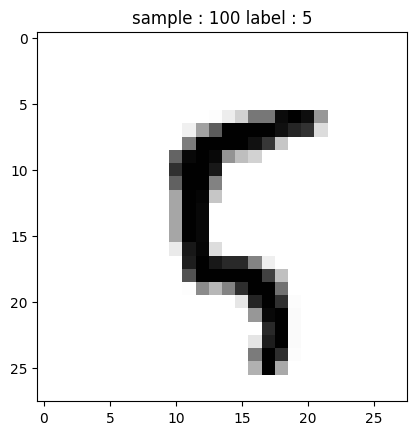

In [9]:
display_sample(100)

In [10]:
images = train_images[0].reshape([1, 784])

In [11]:
for i in range(1, 500):
    images = np.concatenate((images, train_images[i].reshape([1, 784])))

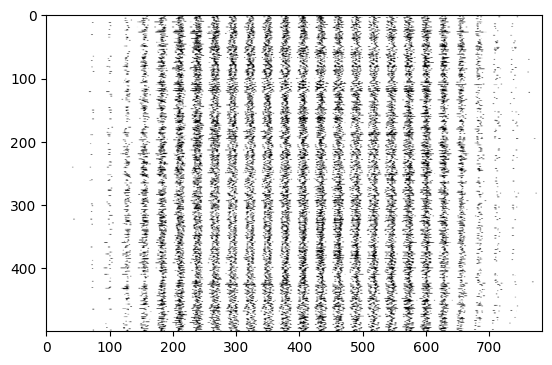

In [12]:
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [13]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [14]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [15]:
print(input_weights)
print(input_biases)

<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(512,) dtype=float32_ref>


In [16]:
init = tf.global_variables_initializer()

with tf.Session() as s:
    init.run()
    print(hidden_weights.eval()[0])

[ 0.5176564   0.49745476 -0.20441236 -0.02831067 -0.9092208  -0.11533442
  0.6861877   0.2716723   0.6292578   0.93302226]


2024-04-15 11:20:19.630513: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


In [17]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [18]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=digit_weights, labels=target_labels))

In [19]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [20]:
correct_prediction = tf.equal(tf.argmax(digit_weights, 1), tf.argmax(target_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [22]:
def next_batch(num, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [23]:
# Warning : Running the code below uses a significant amount of CPU.

count = 0

for x in range(2000):
    (x_batches, y_batches) = next_batch(100, train_images, train_labels)
    sess.run(optimizer, feed_dict={input_images: x_batches, target_labels: y_batches})

    if x % 100 == 0 :
        count += 1
        print('training epoch: ' + str(count))
        print('accuracy: ' + str(sess.run(accuracy, feed_dict={input_images: test_images, target_labels: test_labels})))
    

training epoch: 1
accuracy: 0.1971
training epoch: 2
accuracy: 0.8793
training epoch: 3
accuracy: 0.8986
training epoch: 4
accuracy: 0.9071


KeyboardInterrupt: 

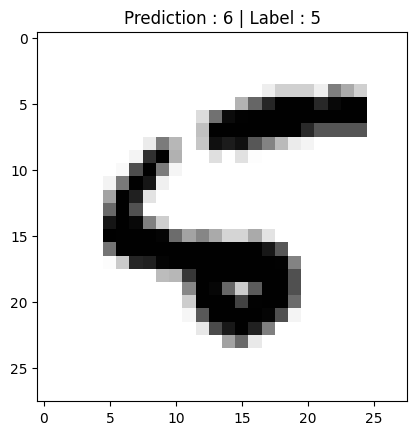

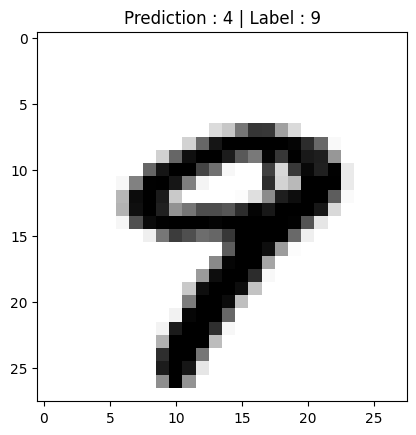

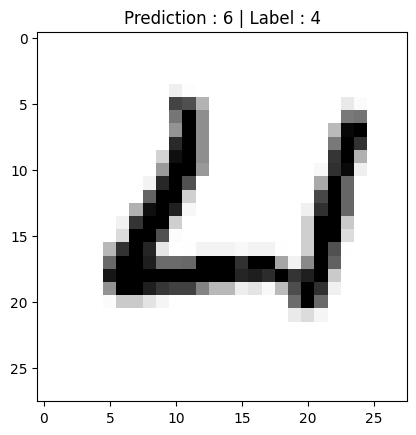

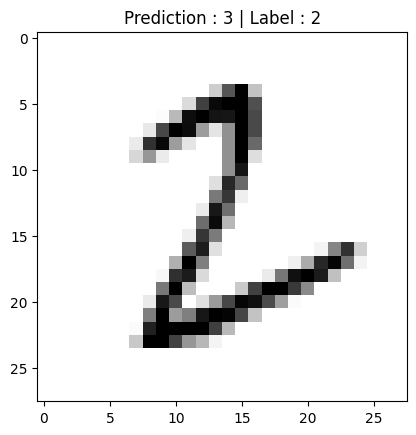

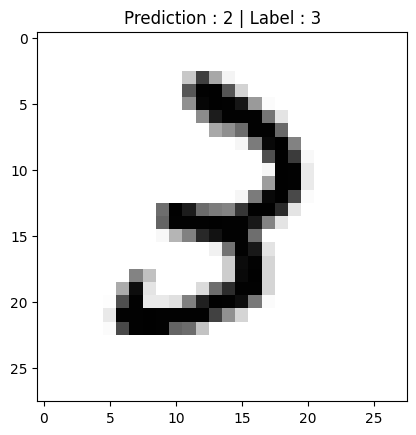

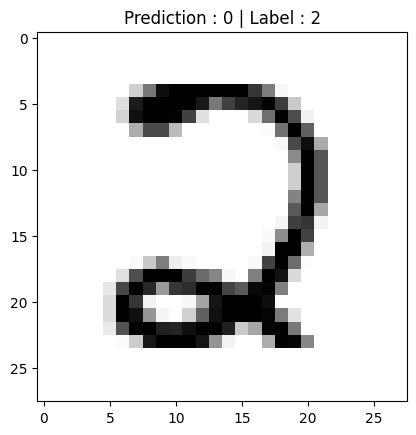

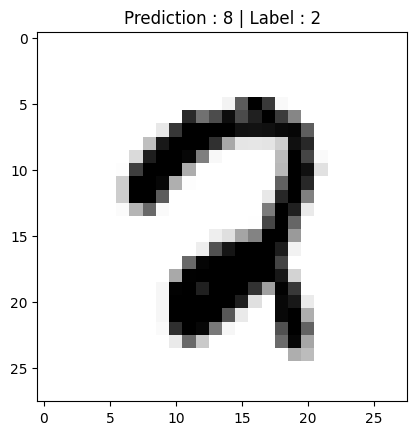

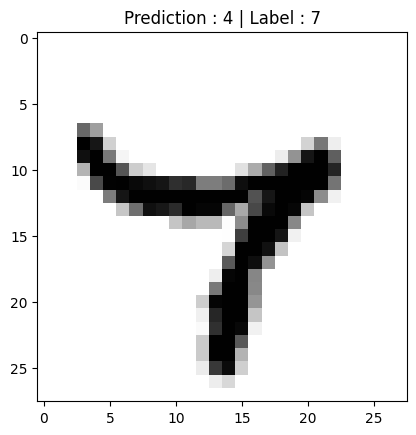

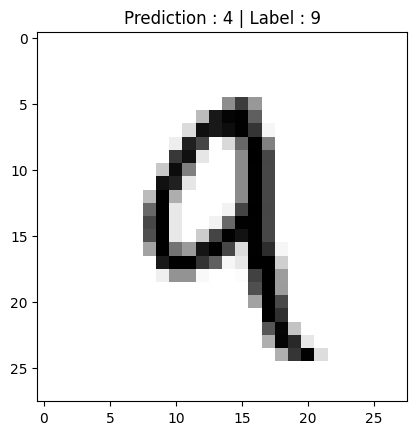

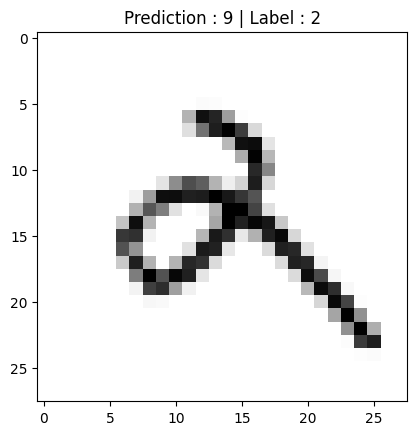

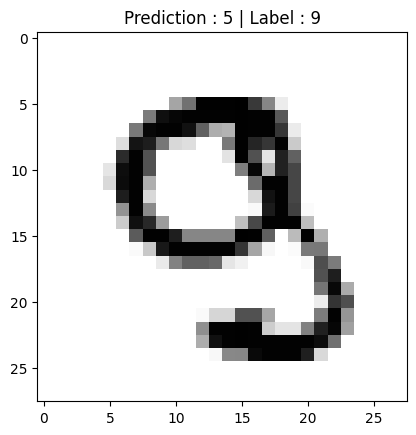

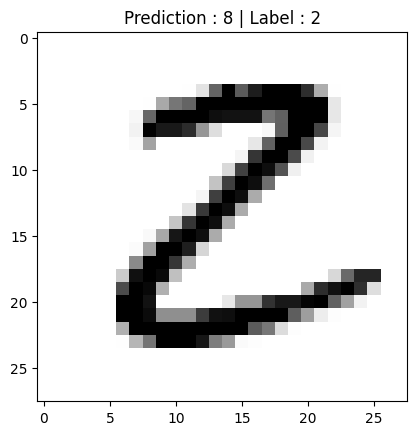

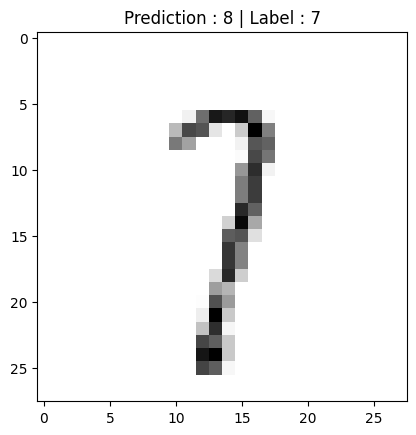

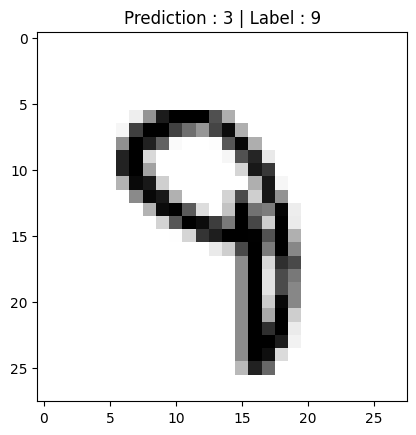

In [24]:
for x in range(200):
    x_train = test_images[x,:].reshape(1, 784)
    y_train = test_labels[x,:]

    label = y_train.argmax()

    prediction = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()

    if prediction != label:
        plt.title('Prediction : %d | Label : %d' % (prediction, label))
        plt.imshow(x_train.reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
        plt.show()